In [1]:
import matplotlib

matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

In [2]:
#import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import elviz_utils
import abundance_utils
import abundance_plot_utils

# Plotting

In [4]:
data_reduced_genus = pd.read_csv("./results/reduced_data--genus_only.csv")

In [5]:
abundance_utils.filter_by_abundance(data=data_reduced_genus, 
                    column='abundance', high=1, low=0.5).head()

['Methylobacter' 'Methylophilus' 'Methylosarcina' 'other']


,ID,rep,week,oxy,Genus,Length,abundance,project
0,106_HOW12,4,12,High,Methylobacter,4325001,0.701923,1056226
1,76_LOW10,4,10,Low,Methylobacter,6062067,0.701577,1056166
2,94_HOW11,4,11,High,Methylobacter,5268714,0.698849,1056202
3,82_HOW10,4,10,High,Methylobacter,5488758,0.693746,1056178
4,40_LOW7,4,7,Low,Methylobacter,6012817,0.668513,1056094


## Demo `plot_heatmap()`

keep only High oxygen samples
['Methylobacter' 'Methylophilus' 'Methylosarcina' 'other']
filename: High_oxygen--0.5_to_1_abundance


/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


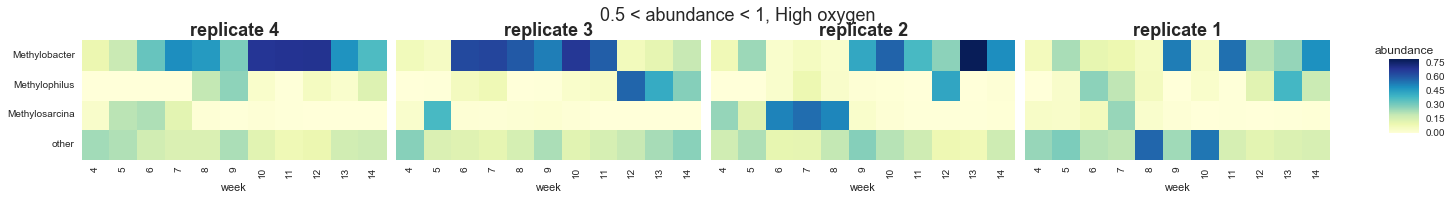

In [6]:
plot_path = "./plots/genus_only"

abundance_plot_utils.plot_heatmap_genus(dataframe=data_reduced_genus, 
                                        high=1, low = 0.5, 
                                        oxy='High', rep='all', 
                                        plot_dir=plot_path)

## Run `plot_heatmap_genus()` across broad conditions

keep only Low oxygen samples
['Methylobacter' 'other' 'Methylotenera' 'Flavobacterium' 'Methylosarcina']
filename: Low_oxygen--0.01_to_1_abundance
keep only Low oxygen samples
['Methylobacter' 'other' 'Methylotenera' 'Flavobacterium' 'Acidovorax']
filename: Low_oxygen--0.05_to_1_abundance
keep only Low oxygen samples
['Methylobacter' 'other' 'Methylotenera' 'Flavobacterium']
filename: Low_oxygen--0.1_to_1_abundance
keep only Low oxygen samples
['Methylobacter']
filename: Low_oxygen--0.5_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Methylotenera' 'Methylophilus' 'other' 'Methylosarcina']
filename: High_oxygen--0.01_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Methylotenera' 'Methylophilus' 'other' 'Methylosarcina']
filename: High_oxygen--0.05_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Methylotenera' 'Methylophilus' 'other' 'Methylosarcina']
filename: High_oxygen--0.1_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Me

/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


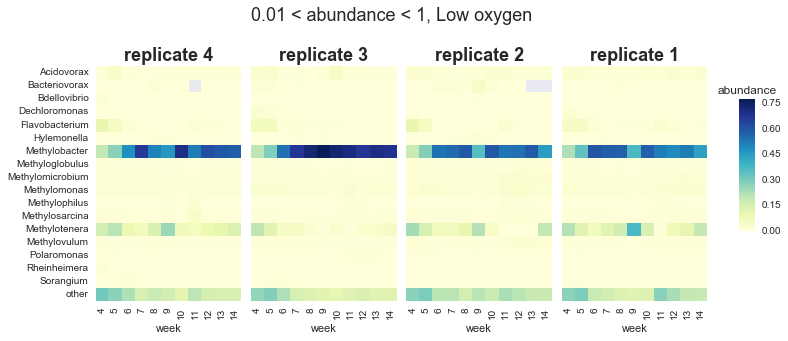

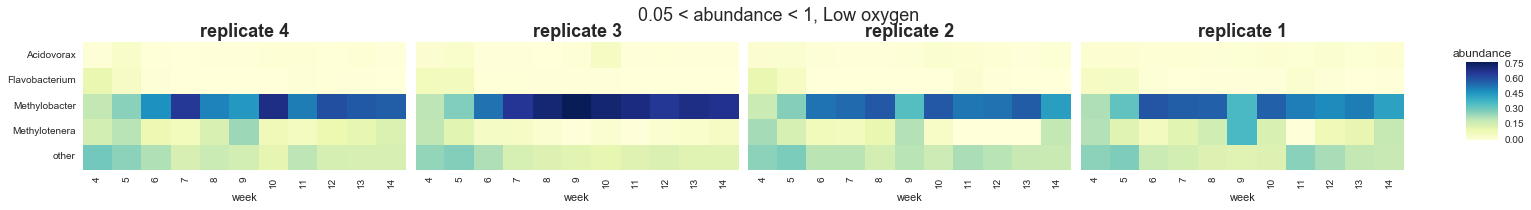

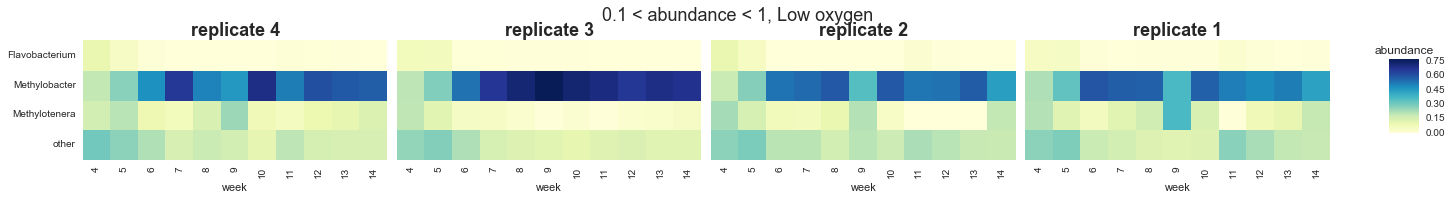

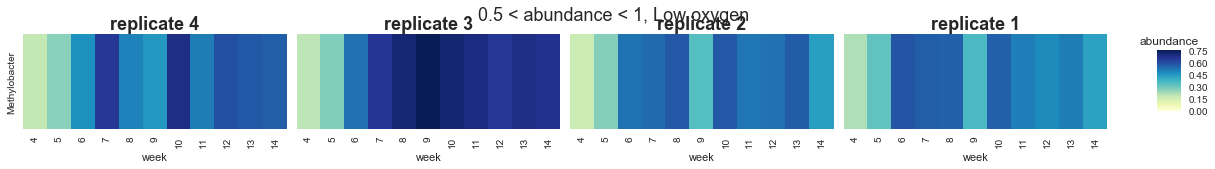

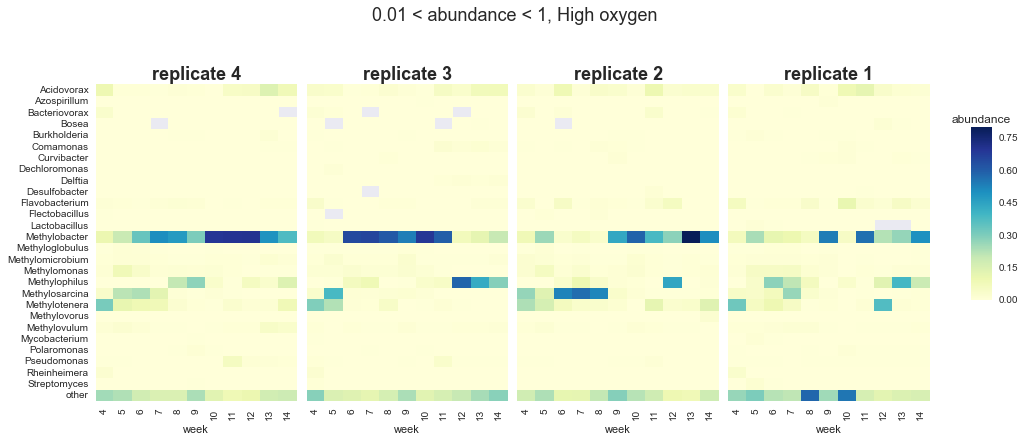

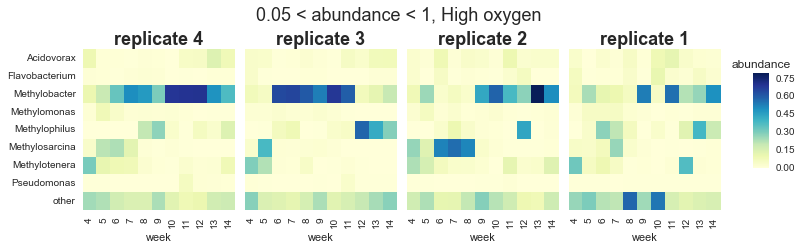

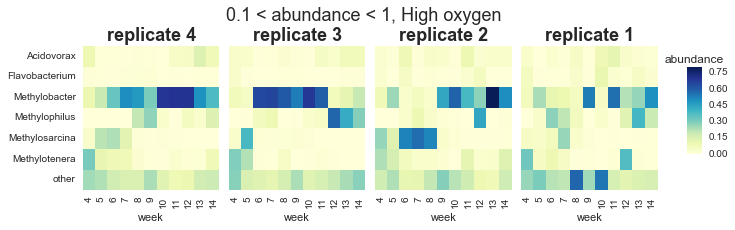

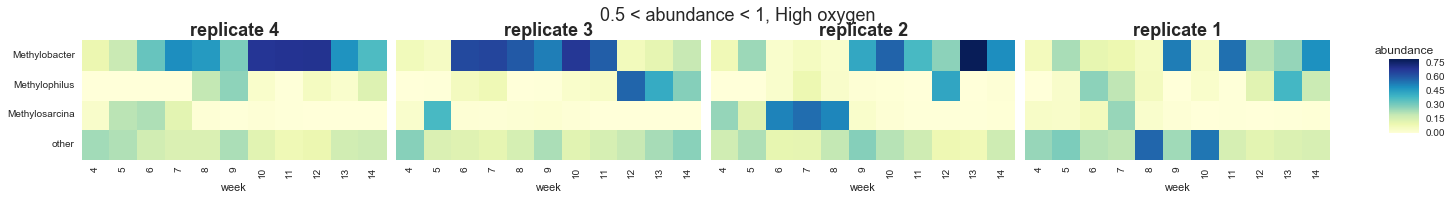

In [7]:
# Loop through the ranges we want. 
oxy_conditions = ['Low', 'High']
max_abundance = 1
range_pairs = [(0.01, max_abundance), 
               (0.05, max_abundance), 
               (0.1, max_abundance), 
               (0.5, max_abundance)]
for o in oxy_conditions:
    for r in range_pairs:
        #print "oxygen:", o
        #print "range:", r
        #print "range (low):", r[0]
        abundance_plot_utils.plot_heatmap_genus(dataframe=data_reduced_genus,
                                                low =r[0], high=r[1], oxy=o, rep='all',
                                                plot_dir ='./plots/genus_only')

## `plot_across_phylogeny()`

Reproduce Mila's plots which often have mixed phylogeny levels.

Import the data that was *not* reduced to Genus. 

In [8]:
data_reduced = pd.read_csv("./results/reduced_data--all_phylogeny_remains.csv")

In [9]:
plot_1_spec_dict = {'Phylum':['Bacteroidetes'], 
                    'Order':['Burkholderiales','Methylophilales',
                             'Methylococcales']}

In [10]:
plot_1_data = abundance_plot_utils.aggregate_mixed_phylogeny(dataframe = 
                          pd.read_csv(
        "./results/reduced_data--all_phylogeny_remains.csv"),
                          phylo_dict = plot_1_spec_dict)

Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')


In [11]:
plot_1_data.head()

,ID,abundance sum,phylogenetic level,phylogenetic name,oxy,rep,week,project
0,100_LOW12,0.058808,Order,Burkholderiales,Low,4,12,1056214
1,100_LOW12,0.103922,Order,Methylophilales,Low,4,12,1056214
2,100_LOW12,0.673723,Order,Methylococcales,Low,4,12,1056214
3,100_LOW12,0.016338,Phylum,Bacteroidetes,Low,4,12,1056214
4,103_HOW12,0.100325,Order,Burkholderiales,High,1,12,1056217


In [12]:
p_dicts = [
    {'Phylum':['Bacteroidetes'], 
     'Order':['Burkholderiales', 'Methylophilales', 'Methylococcales']},
        
    {'Genus':['Methylobacter', 'Methylovulum', 'Methylomonas', 'Methylomicrobium', 
              'Methyloglobulus', 'Methylococcus', 'Methylocaldum', 'Methylosarcina']},
    
    {'Genus':['Methylotenera', 'Methylovorus', 'Methylophilus', 'Methylobacillus']}

    ]

In [13]:
for p in p_dicts:
    print(p)
    print(abundance_plot_utils.phylo_dict_to_descriptive_string(p))

{'Order': ['Burkholderiales', 'Methylophilales', 'Methylococcales'], 'Phylum': ['Bacteroidetes']}
Order
Phylum
Order-Burkholderiales_Methylophilales_Methylococcales--Phylum-Bacteroidetes
{'Genus': ['Methylobacter', 'Methylovulum', 'Methylomonas', 'Methylomicrobium', 'Methyloglobulus', 'Methylococcus', 'Methylocaldum', 'Methylosarcina']}
Genus
Genus-Methylobacter_Methylovulum_Methylomonas_Methylomicrobium_Methyloglobulus_Methylococcus_Methylocaldum_Methylosarcina
{'Genus': ['Methylotenera', 'Methylovorus', 'Methylophilus', 'Methylobacillus']}
Genus
Genus-Methylotenera_Methylovorus_Methylophilus_Methylobacillus


Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
plot_data.head()
          ID  abundance sum phylogenetic level phylogenetic name   oxy  rep  \
0  100_LOW12       0.058808              Order   Burkholderiales   Low    4   
1  100_LOW12       0.103922              Order   Methylophilales   Low    4   
2  100_LOW12       0.673723              Order   Methylococcales   Low    4   
3  100_LOW12       0.016338            

/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


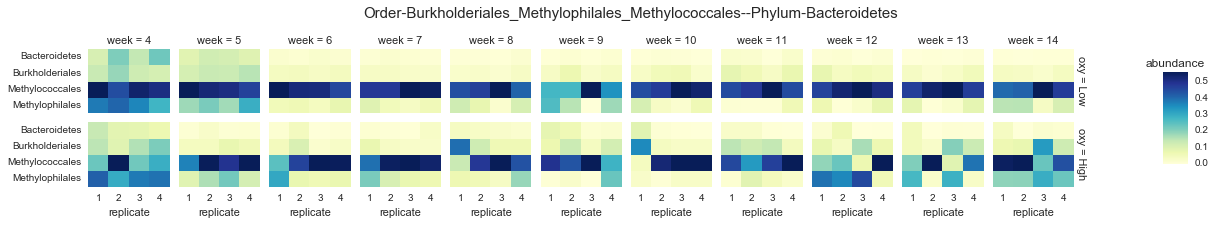

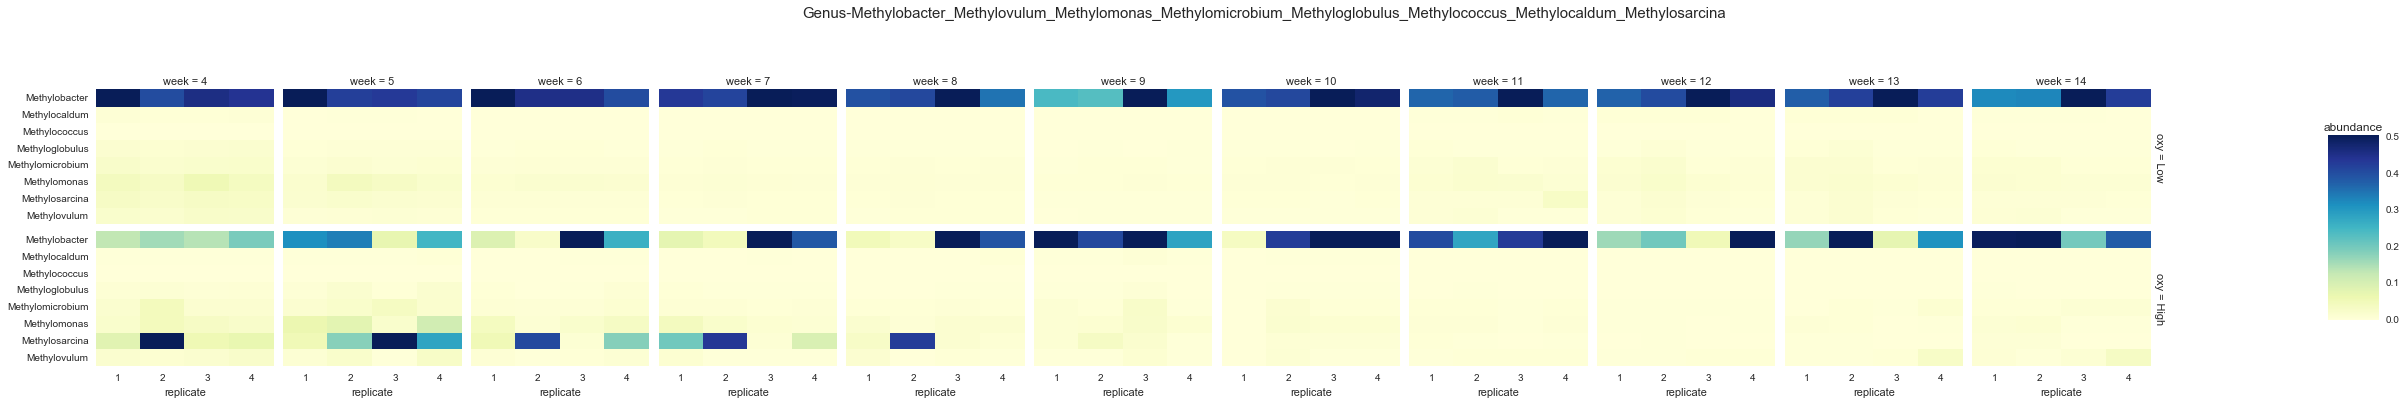

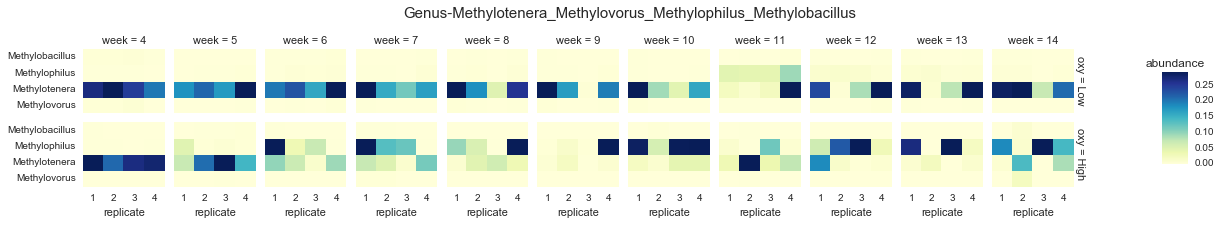

In [14]:
# plot without annotations
for p_dict in p_dicts:
    abundance_plot_utils.plot_across_phylogeny(dataframe = 
                          pd.read_csv("./results/reduced_data--all_phylogeny_remains.csv"),
                          phylo_dict = p_dict,
                          annotate=False,
                          plot_dir='./plots/mixed_phylogeny/')
    

Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
plot_data.head()
          ID  abundance sum phylogenetic level phylogenetic name   oxy  rep  \
0  100_LOW12       0.058808              Order   Burkholderiales   Low    4   
1  100_LOW12       0.103922              Order   Methylophilales   Low    4   
2  100_LOW12       0.673723              Order   Methylococcales   Low    4   
3  100_LOW12       0.016338            

/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


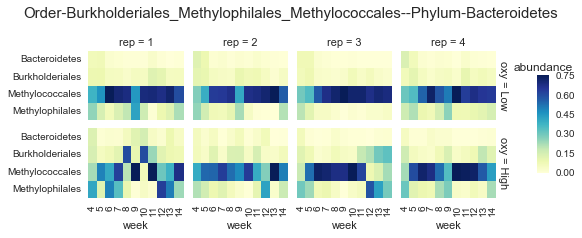

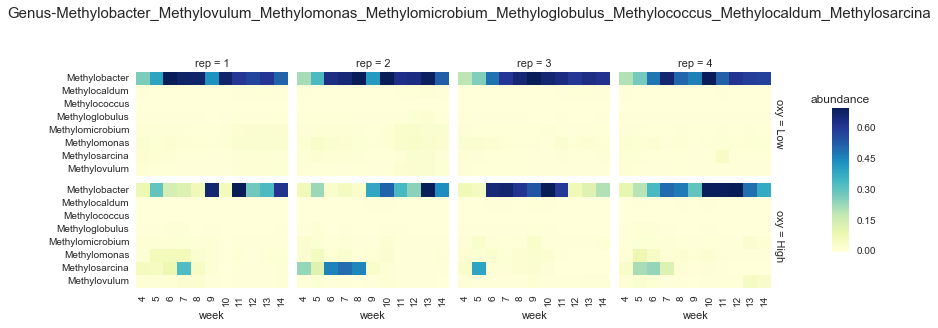

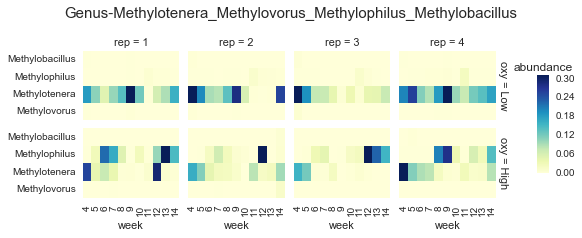

In [15]:
# plot with annotations
for p_dict in p_dicts:
    abundance_plot_utils.plot_across_phylogeny(dataframe = 
                                               pd.read_csv("./results/reduced_data--all_phylogeny_remains.csv"),
                                               phylo_dict = p_dict,
                                               facet='rep',
                                               annotate=False,
                                               plot_dir='./plots/mixed_phylogeny/')